# Setup

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys
import nd2
import cv2 as cv
import matplotlib.patches as patches

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from data import config
from data.data import Data, load_datasets

config.ROOT_PATH = os.path.abspath(os.path.join('..'))

In [59]:
# Indecies for subsample of dataset to perform testing on
# Looking at 100 droplets RANDOMLY selected from the dataset
columns, rows = 10, 10 # can be changed to vary the number of droplets being investigated

np.random.seed(42) # set the seed

# Just to get the length of the dataset
dataset = Data()
labels = dataset.labels[:,1]

idxs = np.random.randint(1, len(dataset), 100)

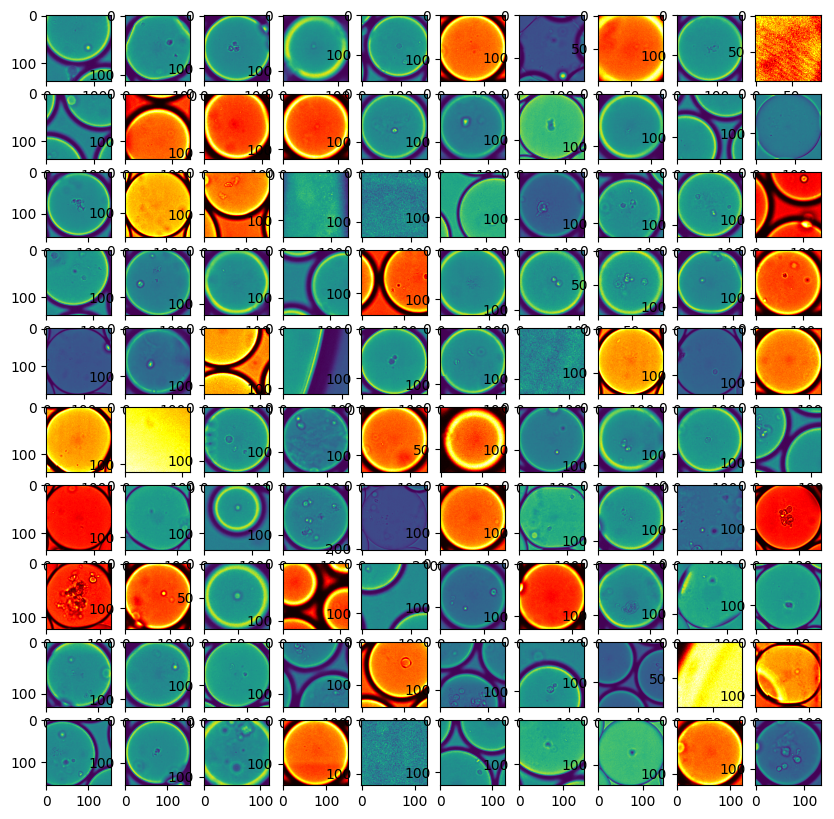

In [60]:
#plot samples
fig = plt.figure(figsize=(10, 10))
fig_index = 1
for idx in idxs:
    img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')
    fig.add_subplot(rows, columns, fig_index)
    fig_index += 1
    if labels[idx] == 0:
        color_map = 'hot'
    else:
        color_map = 'viridis'
    plt.imshow(img[img.shape[0]-1,:,:], cmap=color_map)
plt.show()

# Edge --> Circle Criterion Filtering

In [61]:
def plot_circles(feature_circles, colors, padding = 10, plot=False, fname='defaultname.png'):
    plt.figure(figsize = (len(mask[0]), len(mask[1])))

    fig, ax = plt.subplots()

    for i in range(len(feature_circles)):
        patch = patches.Circle( feature_circles[i][0], feature_circles[i][1] + padding, linewidth=1, edgecolor=colors[i], facecolor='none')
        ax.add_patch(patch)

    plt.imshow(test)
    if plot:
        plt.savefig(fname)
    plt.show()

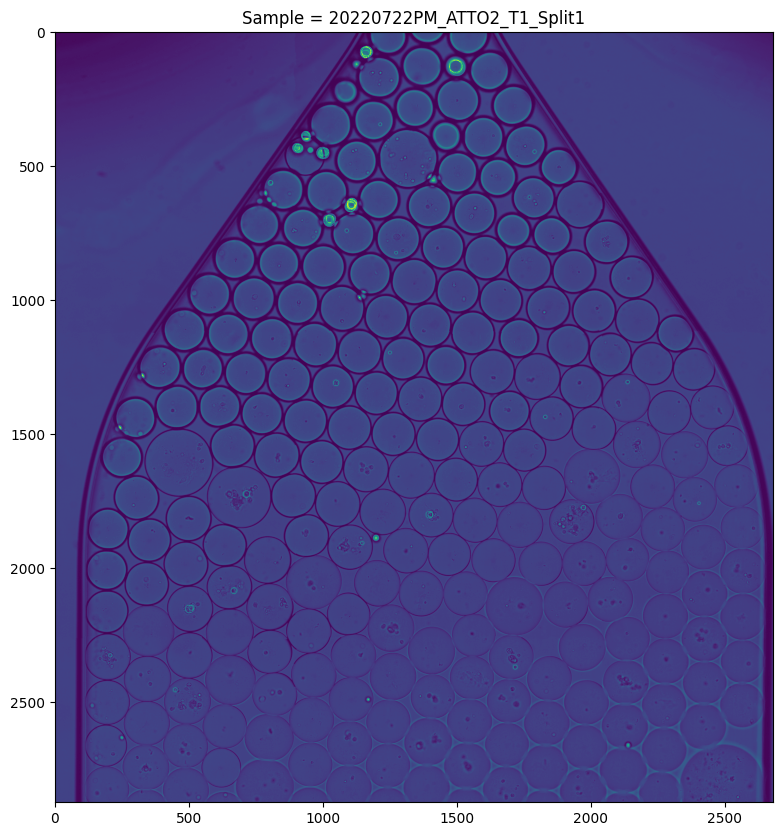

In [67]:
# Test circle detection on entire sample [NOTE: This takes a very long time!!!!]
sample_idx = 4

img = nd2.imread(dataset.sample_list[sample_idx]['img_path'])


# Preprocess image for cv2
gs_image = img[img.shape[0]-1,:,:]
max_val = gs_image.max()
gs_image = (gs_image / gs_image.max()) * 255
gs_image = np.array(gs_image, dtype = np.uint8)


fig, ax = plt.subplots(figsize=(10, 10))

'''
circles = cv.HoughCircles(gs_image, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=500)[0]


for i in range(len(circles)):
    patch = patches.Circle( circles[i][:2], circles[i][2], linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(patch)

'''


plt.title('Sample = ' + dataset.sample_list[sample_idx]['name'])
plt.imshow(a)


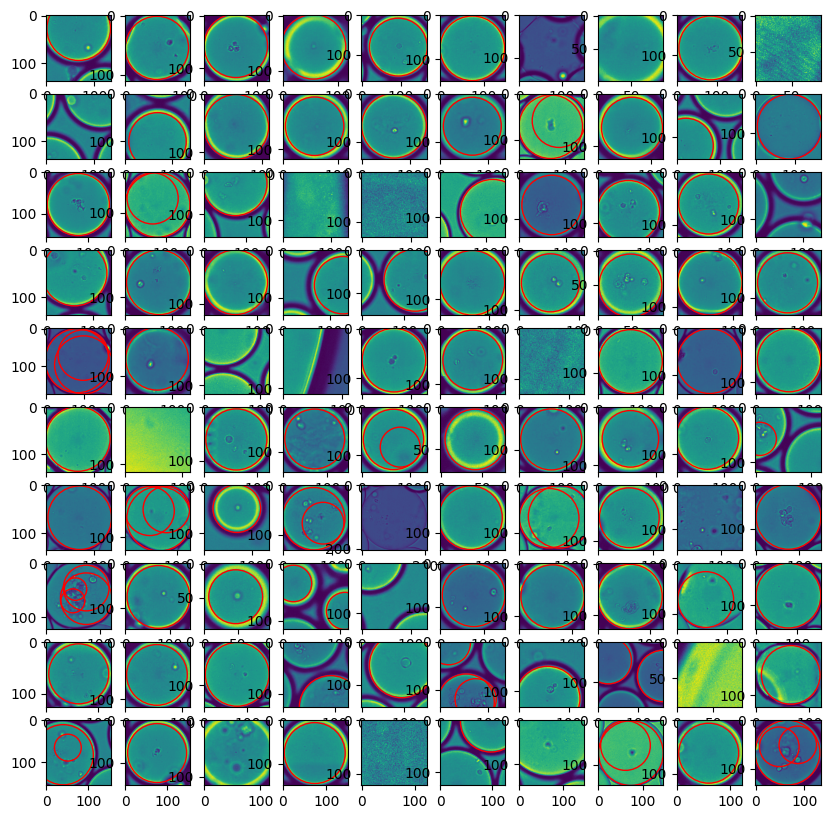

In [96]:
#plot samples
fig = plt.figure(figsize=(10, 10))
fig_index = 1
for idx in idxs:
    img = np.load(f'{config.ROOT_PATH}/data/clean/img{idx}.npy')
    img = img[img.shape[0]-1,:,:]
    
    # Put in openCV format
    img = (img / img.max()) * 255
    img = np.array(img, dtype = np.uint8)
    
    # Find circles
    circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 20,
                               param1=120, param2=30,
                               minRadius=20, maxRadius=img.shape[0]//2)
    if circles is None:
        circles = []
    else:
        circles = circles[0]

    #print(len(circles))
    
    ax = fig.add_subplot(rows, columns, fig_index)
    fig_index += 1
    circ_plots = []
    
    for circ in circles:
        circ_plot = plt.Circle(circ[:2], circ[2], color='r', fill=False)
        ax.add_patch( circ_plot )
        
    plt.imshow(img, cmap='viridis')
plt.show()

# Alibi-Detect Outlier Detection

### The following methods are supported for image outlier detection:
1. AE
2. VAE
3. AEGMM
4. VAEGMM
5. Likelihood Ratios

## !Depresingly these are all semi supervised

In [16]:
#!pip install alibi-detect[torch]
#!pip install -Iv numpy==1.22.1

#import pkg_resources
import alibi_detect as alibi


In [8]:
# Lord have mercy
from alibi_detect.od import 

'0.10.4'